In [3]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

Column_name Column_type Data_type  \
0           LoanID  Identifier    string   
1              Age     Feature   integer   
2           Income     Feature   integer   
3       LoanAmount     Feature   integer   
4      CreditScore     Feature   integer   
5   MonthsEmployed     Feature   integer   
6   NumCreditLines     Feature   integer   
7     InterestRate     Feature     float   
8         LoanTerm     Feature   integer   
9         DTIRatio     Feature     float   
10       Education     Feature    string   
11  EmploymentType     Feature    string   
12   MaritalStatus     Feature    string   
13     HasMortgage     Feature    string   
14   HasDependents     Feature    string   
15     LoanPurpose     Feature    string   
16     HasCoSigner     Feature    string   
17         Default      Target   integer   

                                                                                          Description  
0                                                                  A unique identifier for each loan.  
1                                                                            The age of the borrower.  
2                                                                  The annual income of the borrower.  
3                                                                 The amount of money being borrowed.  
4                                The credit score of the borrower, indicating their creditworthiness.  
5                                                The number of months the borrower has been employed.  
6                                                   The number of credit lines the borrower has open.  
7                                                                     The interest rate for the loan.  
8                                                              The term length of the loan in months.  
9                  The Debt-to-Income ratio, indicating the borrower's debt compared to their income.  
10  The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).  
11   The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).  
12                                    The marital status of the borrower (Single, Married, Divorced).  
13                                                   Whether the borrower has a mortgage (Yes or No).  
14                                                   Whether the borrower has dependents (Yes or No).  
15                                  The purpose of the loan (Home, Auto, Education, Business, Other).  
16                                                      Whether the loan has a co-signer (Yes or No).  
17                   The binary target variable indicating whether the loan defaulted (1) or not (0).

In [4]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [18]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

<Axes: xlabel='Default', ylabel='Age'>

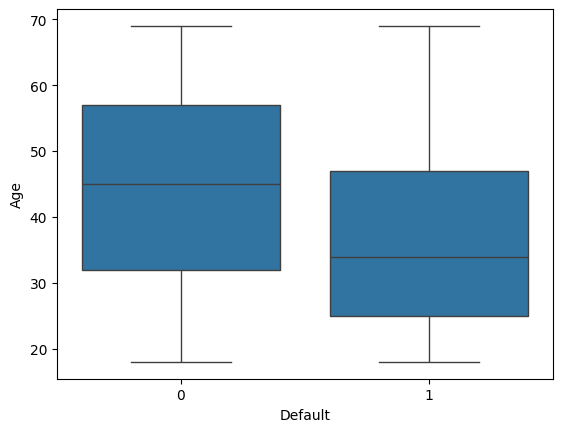

In [29]:
sns.boxplot(x='Default', y='Age', data=train_df)

### Median age of defaulters is much higher

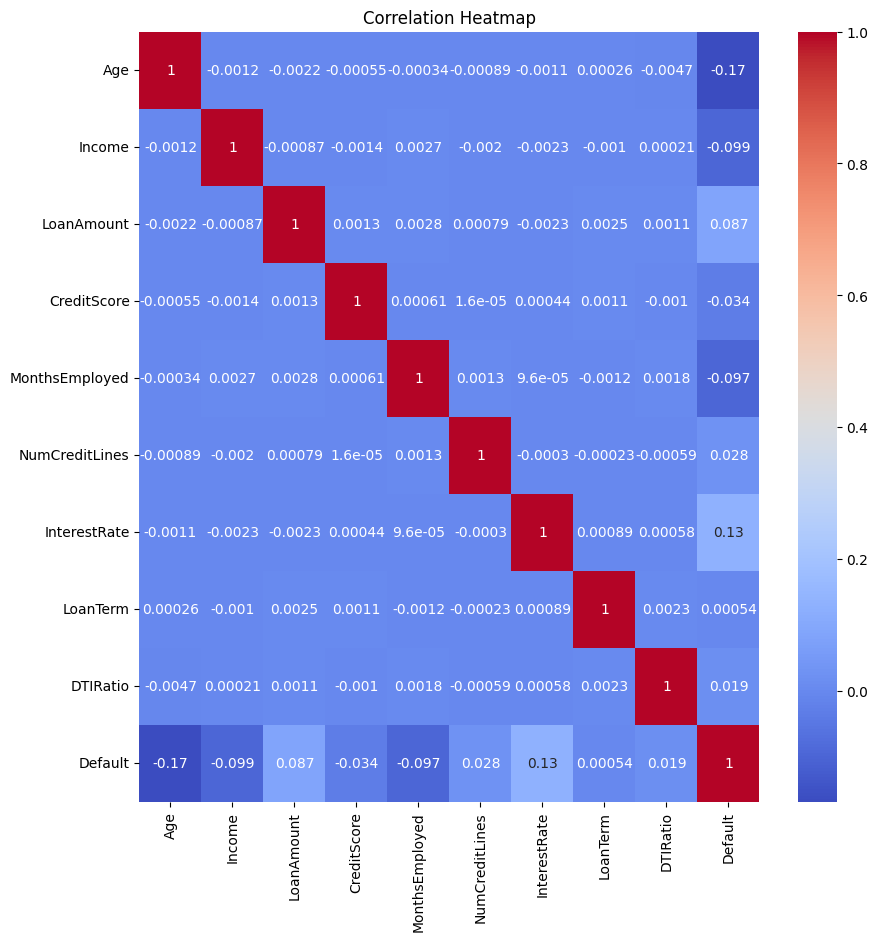

In [35]:
num_columns=train_df.select_dtypes(exclude='object')
plt.figure(figsize=(10,10))
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

### No strong correlations to worry about

## First we try Random Forests

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = train_df.drop(columns=["LoanID", "Default"])
y = train_df["Default"]

# Encode categorical variables using LabelEncoder
categorical_cols = X.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le



# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on validation set
y_pred = clf.predict(X_val)

# Evaluation
#report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)


# Convert it to a DataFrame for clean display


#report, conf_matrix

In [21]:
report_dict = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Round the values for readability
report_df = report_df.round(3)

# Display the DataFrame
report_df

precision  recall  f1-score    support
0                 0.889   0.996     0.940  45170.000
1                 0.625   0.048     0.089   5900.000
accuracy          0.887   0.887     0.887      0.887
macro avg         0.757   0.522     0.514  51070.000
weighted avg      0.858   0.887     0.841  51070.000

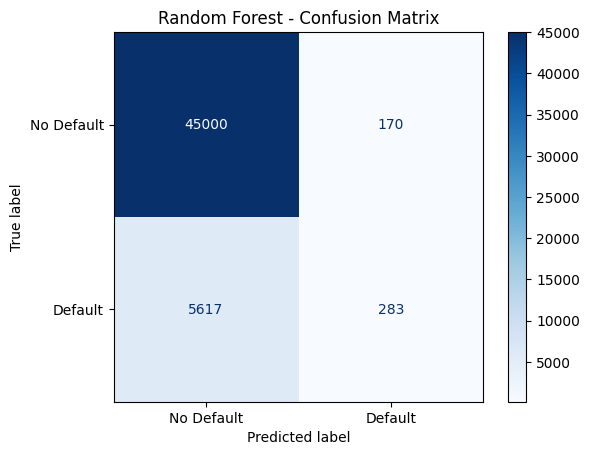

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)

# Display as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

## We have too many false negatives! That is, recall late is really low. About 5000 people predicted to be safe actually defaulted - this is very risky. Lets tune our Random Forest model to focus more on defaulters

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Tells the model to focus more on minority class
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred_2 = rf_model.predict(X_val)

# Evaluation
#report = classification_report(y_val, y_pred)
conf_matrix_2 = confusion_matrix(y_val, y_pred_2)
report_dict = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Round the values for readability
report_df = report_df.round(3)


In [57]:
report_df

precision  recall  f1-score    support
0                 0.889   0.996     0.940  45170.000
1                 0.625   0.048     0.089   5900.000
accuracy          0.887   0.887     0.887      0.887
macro avg         0.757   0.522     0.514  51070.000
weighted avg      0.858   0.887     0.841  51070.000

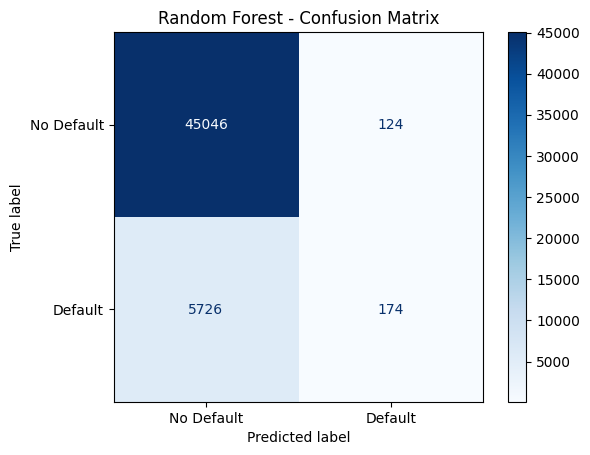

In [58]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

## That didnt work. What if we try to lower the threshold, which is currently 0.5?

In [60]:
# Predict probabilities
y_probs = rf_model.predict_proba(X_val)[:, 1]

# Lower threshold to catch more defaulters
y_pred_low_thresh = (y_probs > 0.25).astype(int)
print(classification_report(y_val, y_pred_low_thresh))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     45170
           1       0.37      0.26      0.30      5900

    accuracy                           0.86     51070
   macro avg       0.64      0.60      0.61     51070
weighted avg       0.84      0.86      0.85     51070



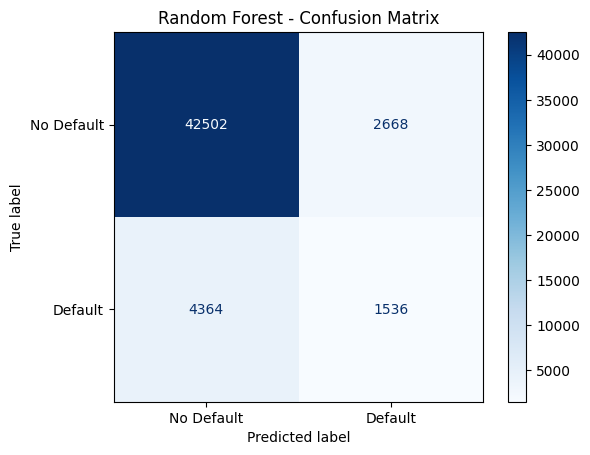

In [64]:
cf_lt= confusion_matrix(y_val, y_pred_low_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_lt, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

## Now the recall lates for defaulters are higher, and we are catching more defaulters. But surely there should be a better way than lowering the threshold by hand.

## Now we try Logistic regression and compare results

In [52]:
from sklearn.linear_model import LogisticRegression


# Train/test split
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_s, y_train_s)

# Predict and evaluate
y_pred_s = log_reg.predict(X_val_s)
log_report = classification_report(y_val_s, y_pred_s)
log_conf_matrix = confusion_matrix(y_val_s, y_pred_s)

log_report, log_conf_matrix


C:\Users\manij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94     45170\n           1       0.58      0.03      0.06      5900\n\n    accuracy                           0.89     51070\n   macro avg       0.74      0.51      0.50     51070\nweighted avg       0.85      0.89      0.84     51070\n',
 array([[45046,   124],
        [ 5726,   174]]))

In [53]:
report_dict = classification_report(y_val_s, y_pred_s, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Round the values for readability
report_df = report_df.round(3)

# Display the DataFrame
report_df

precision  recall  f1-score    support
0                 0.887   0.997     0.939  45170.000
1                 0.584   0.029     0.056   5900.000
accuracy          0.885   0.885     0.885      0.885
macro avg         0.736   0.513     0.498  51070.000
weighted avg      0.852   0.885     0.837  51070.000

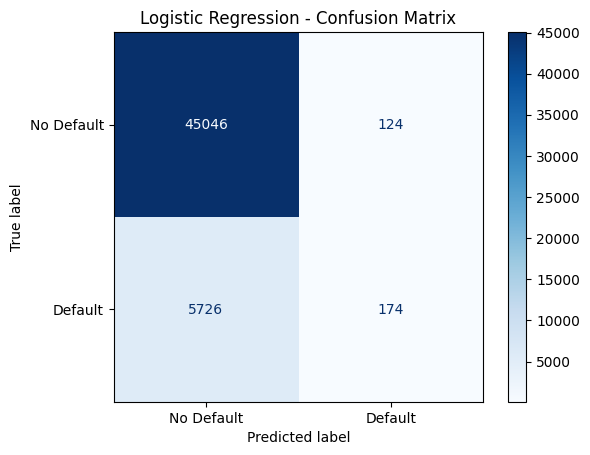

In [65]:
cm_lr = confusion_matrix(y_val_s, y_pred_s)

# Display as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [45]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          109435 non-null  object 
 1   Age             109435 non-null  int64  
 2   Income          109435 non-null  int64  
 3   LoanAmount      109435 non-null  int64  
 4   CreditScore     109435 non-null  int64  
 5   MonthsEmployed  109435 non-null  int64  
 6   NumCreditLines  109435 non-null  int64  
 7   InterestRate    109435 non-null  float64
 8   LoanTerm        109435 non-null  int64  
 9   DTIRatio        109435 non-null  float64
 10  Education       109435 non-null  int64  
 11  EmploymentType  109435 non-null  int64  
 12  MaritalStatus   109435 non-null  int64  
 13  HasMortgage     109435 non-null  int64  
 14  HasDependents   109435 non-null  int64  
 15  LoanPurpose     109435 non-null  int64  
 16  HasCoSigner     109435 non-null  int64  
dtypes: float64

## Lets try XGBoost, which is known to better handle imbalances

In [75]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight = (non-defaulters / defaulters)
ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(scale_pos_weight=ratio,use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


C:\Users\manij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:26:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [76]:
y_predXGB=xgb.predict(X_val)
print(classification_report(y_val, y_predXGB))


              precision    recall  f1-score   support

           0       0.94      0.73      0.82     45170
           1       0.23      0.62      0.34      5900

    accuracy                           0.72     51070
   macro avg       0.58      0.67      0.58     51070
weighted avg       0.85      0.72      0.76     51070



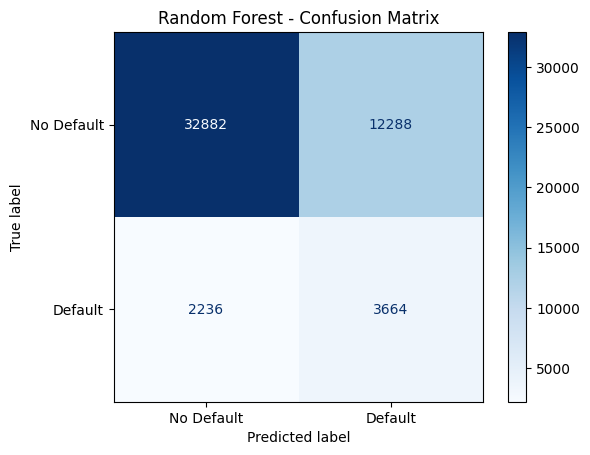

In [77]:
cf_xgb= confusion_matrix(y_val, y_predXGB)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_xgb, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

## We have succesfully increased the recall, but the number of false positives are way too high right now

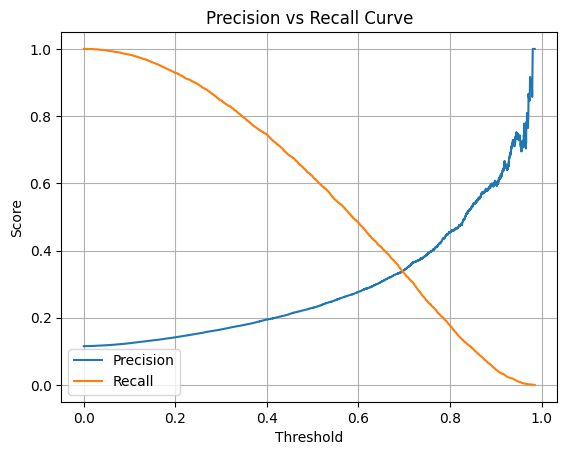

In [78]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_probs = xgb.predict_proba(X_val)[:, 1]

# Get precision-recall-threshold curve
precision, recall, thresholds = precision_recall_curve(y_val, y_probs)

# Plot to find a better threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall Curve")
plt.legend()
plt.grid()
plt.show()


## This curve shows the trade off between Precision and Threshold. If our goal is to catch more risky borrowers we should pick a low threshold, and if we confidence in our borrowers and want to focus more on precision(for example, VIP clients), we should use a higher threshold. Now only 11 % of the total customers in this dataset are defaulters, so it makes sense to achieve a balance between precision and recall

In [79]:
train_df['LoanAmount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 255347 entries, 0 to 255346
Series name: LoanAmount
Non-Null Count   Dtype
--------------   -----
255347 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


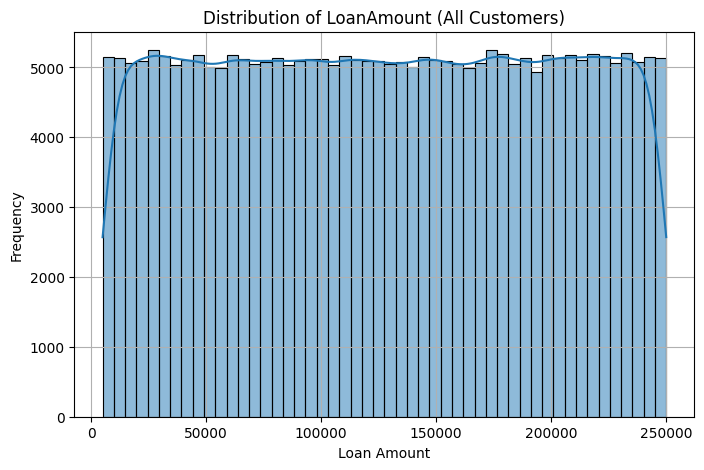

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['LoanAmount'], bins=50, kde=True)
plt.title("Distribution of LoanAmount (All Customers)")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

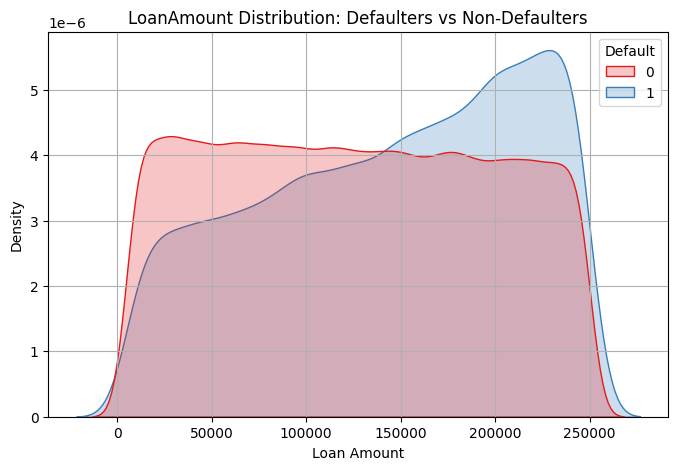

In [81]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=train_df, x='LoanAmount', hue='Default', fill=True, common_norm=False, palette='Set1')
plt.title("LoanAmount Distribution: Defaulters vs Non-Defaulters")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()


## This curve shows that there is a large number of defaulters with very large loan amounts. Therefore even though the no of defaulters is relatively small, their impact is huge. Therefore, for this problem we should prioritize increasing recall, and thus choose a lower threshold!

In [87]:
# 1. Choose a lower threshold (e.g., 0.35)
threshold = 0.4

# 2. Make predictions using that threshold
y_pred_thresh = (y_probs > threshold).astype(int)

print(confusion_matrix(y_val, y_pred_thresh))

[[26988 18182]
 [ 1502  4398]]


## Unfortunately this dramatically increases the no of false positives - we are denying credit to 18k good customers - this will also lead to lost revenue. Ultimately the final decision depends on the business model and economic situation. For this case, I will choose to balance the recall and precision with a higher cutoff(it occurs at 0.65, see the precision recall curve)

In [88]:
threshold = 0.65

# 2. Make predictions using that threshold
y_pred_thresh = (y_probs > threshold).astype(int)

print(confusion_matrix(y_val, y_pred_thresh))

[[39713  5457]
 [ 3477  2423]]
